# Initial Data Analysis

## Importing the data

In [4]:
#Import CSV

df <- read.csv("data/meteorite_landings/meteorite_landings.csv")

In [5]:
#getting info on the new dataframe

dim(df)
str(df)
summary(df)

[1] 45716    10

'data.frame':	45716 obs. of  10 variables:
 $ name       : chr  "Aachen" "Aarhus" "Abee" "Acapulco" ...
 $ id         : int  1 2 6 10 370 379 390 392 398 417 ...
 $ nametype   : chr  "Valid" "Valid" "Valid" "Valid" ...
 $ recclass   : chr  "L5" "H6" "EH4" "Acapulcoite" ...
 $ mass..g.   : num  21 720 107000 1914 780 ...
 $ fall       : chr  "Fell" "Fell" "Fell" "Fell" ...
 $ year       : chr  "01/01/1880 12:00:00 AM" "01/01/1951 12:00:00 AM" "01/01/1952 12:00:00 AM" "01/01/1976 12:00:00 AM" ...
 $ reclat     : num  50.8 56.2 54.2 16.9 -33.2 ...
 $ reclong    : num  6.08 10.23 -113 -99.9 -64.95 ...
 $ GeoLocation: chr  "(50.775, 6.08333)" "(56.18333, 10.23333)" "(54.21667, -113.0)" "(16.88333, -99.9)" ...


     name                 id          nametype           recclass        
 Length:45716       Min.   :    1   Length:45716       Length:45716      
 Class :character   1st Qu.:12689   Class :character   Class :character  
 Mode  :character   Median :24262   Mode  :character   Mode  :character  
                    Mean   :26890                                        
                    3rd Qu.:40657                                        
                    Max.   :57458                                        
                                                                         
    mass..g.            fall               year               reclat      
 Min.   :       0   Length:45716       Length:45716       Min.   :-87.37  
 1st Qu.:       7   Class :character   Class :character   1st Qu.:-76.71  
 Median :      33   Mode  :character   Mode  :character   Median :-71.50  
 Mean   :   13278                                         Mean   :-39.12  
 3rd Qu.:     203                

## Cleaning up the data

In [6]:
#fixing the year column.

library("lubridate")

df$year <- as.Date(df$year, format = "%m/%d/%Y")
df$year <- as.integer(lubridate::year(df$year))

head(df)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




,name,id,nametype,recclass,mass..g.,fall,year,reclat,reclong,GeoLocation
,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<chr>
1,Aachen,1,Valid,L5,21,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)"
2,Aarhus,2,Valid,H6,720,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)"
3,Abee,6,Valid,EH4,107000,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)"
4,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)"
5,Achiras,370,Valid,L6,780,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)"
6,Adhi Kot,379,Valid,EH4,4239,Fell,1919,32.10000,71.80000,"(32.1, 71.8)"


In [7]:
#header cleanup

names(df)[names(df) == "mass..g."] <- "mass_in_grams"
names(df)[names(df) == "fall"] <- "fell_or_found"
names(df)[names(df) == "reclat"] <- "latitude"
names(df)[names(df) == "reclong"] <- "longitude"

head(df)

,name,id,nametype,recclass,mass_in_grams,fell_or_found,year,latitude,longitude,GeoLocation
,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<chr>
1,Aachen,1,Valid,L5,21,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)"
2,Aarhus,2,Valid,H6,720,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)"
3,Abee,6,Valid,EH4,107000,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)"
4,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)"
5,Achiras,370,Valid,L6,780,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)"
6,Adhi Kot,379,Valid,EH4,4239,Fell,1919,32.10000,71.80000,"(32.1, 71.8)"


In [8]:
#Removing things that turned out not to be meteorites.

meteorites <- df[ which(df$nametype=='Valid'), ]
meteorongs <- df[ which(df$nametype!='Valid'), ] #seewhatididthere?

head(meteorites,5L)
dim(meteorites)

head(meteorongs,5L)
dim(meteorongs)

,name,id,nametype,recclass,mass_in_grams,fell_or_found,year,latitude,longitude,GeoLocation
,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<chr>
1,Aachen,1,Valid,L5,21,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)"
2,Aarhus,2,Valid,H6,720,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)"
3,Abee,6,Valid,EH4,107000,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)"
4,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)"
5,Achiras,370,Valid,L6,780,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)"


[1] 45641    10

,name,id,nametype,recclass,mass_in_grams,fell_or_found,year,latitude,longitude,GeoLocation
,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<chr>
5220,Brunflo,5157,Relict,Relict H,NA,Found,1980,63.11667,14.28333,"(63.11667, 14.28333)"
6819,David Glacier 92308,6614,Relict,Chondrite-fusion crust,1.7,Found,1992,-75.31667,162.00000,"(-75.31667, 162.0)"
12641,Gove,52859,Relict,Relict iron,0.0,Found,1979,-12.26333,136.83833,"(-12.26333, 136.83833)"
15948,Gullhögen 001,44889,Relict,Relict OC,NA,Found,2000,58.38333,13.80000,"(58.38333, 13.8)"
17757,LaPaz Icefield 031037,35780,Relict,Fusion crust,0.1,Found,2003,NA,NA,


[1] 75 10

Warning message:
“Removed 7310 rows containing missing values (geom_point).”


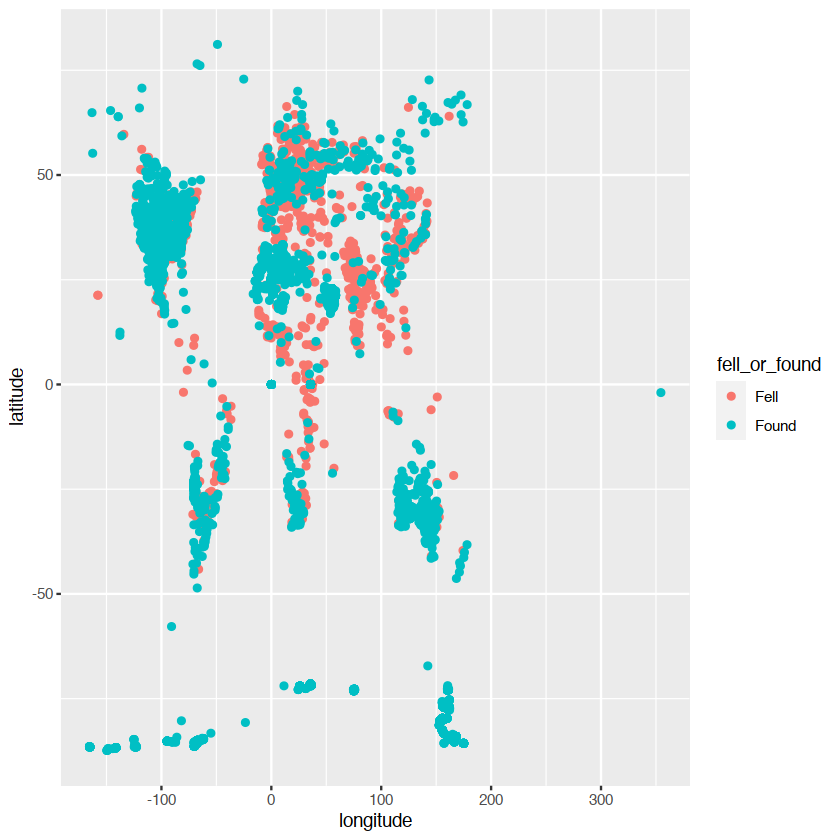

In [9]:
#Basic plot of everything...

library("ggplot2")
ggplot(meteorites, aes(x=longitude, y=latitude, color =fell_or_found)) + geom_point()

## Cleaning up geolocations

In [10]:
#A-ha!  I see a bad geolocation!

baddata <- meteorites[which(meteorites$longitude > 180), ]
baddata

,name,id,nametype,recclass,mass_in_grams,fell_or_found,year,latitude,longitude,GeoLocation
,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<chr>
22947,Meridiani Planum,32789,Valid,"Iron, IAB complex",NA,Found,2005,-1.94617,354.4733,"(-1.94617, 354.47333)"


In [11]:
# Hmm.... wrong planet! https://en.wikipedia.org/wiki/Meridiani_Planum

# Remove
meteorites <- meteorites[which(meteorites$longitude < 180), ]

# Add to meteorongs
meteorongs <- rbind(meteorongs, baddata)



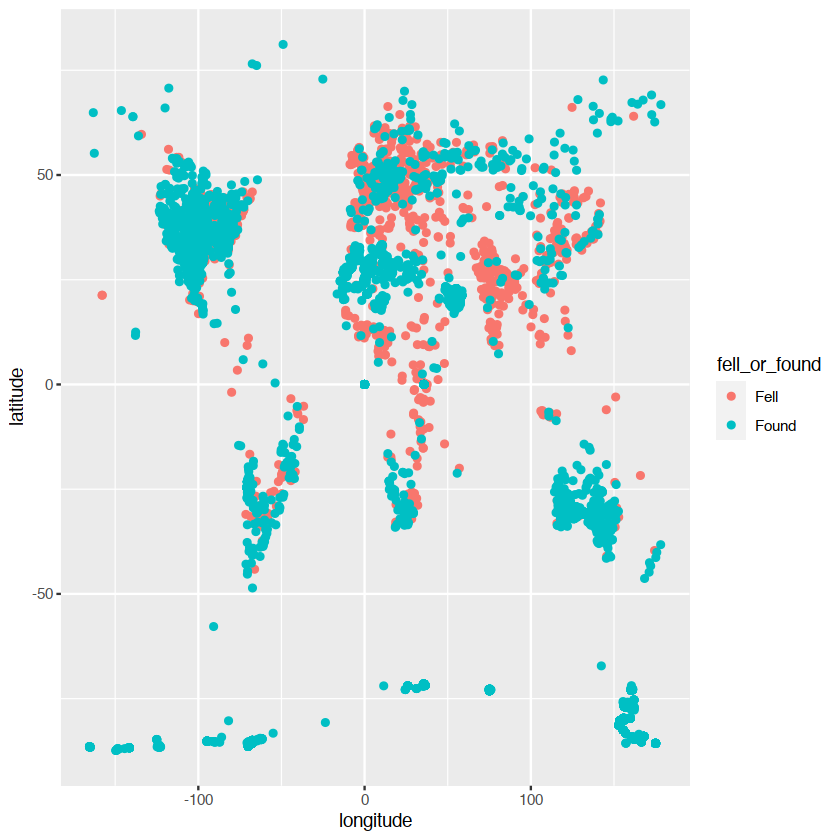

In [12]:
# Redraw

ggplot(meteorites, aes(x=longitude, y=latitude, color =fell_or_found)) + geom_point()

In [13]:
#Better.. but what about the error it gives about rows without a location?

#how many have a lat of 0.0?

no_lat <- meteorites[ which(meteorites$latitude==0), ]
no_long <- meteorites[ which(meteorites$longitude==0), ]
summary(no_lat)
summary(no_long)

     name                 id          nametype           recclass        
 Length:6438        Min.   :15491   Length:6438        Length:6438       
 Class :character   1st Qu.:40052   Class :character   Class :character  
 Mode  :character   Median :51776   Mode  :character   Mode  :character  
                    Mean   :48048                                        
                    3rd Qu.:54366                                        
                    Max.   :57458                                        
                                                                         
 mass_in_grams       fell_or_found           year         latitude
 Min.   :     0.00   Length:6438        Min.   :1945   Min.   :0  
 1st Qu.:     7.09   Class :character   1st Qu.:1998   1st Qu.:0  
 Median :    25.89   Mode  :character   Median :2007   Median :0  
 Mean   :   406.23                      Mean   :2004   Mean   :0  
 3rd Qu.:   124.00                      3rd Qu.:2009   3rd Qu.:0  
 Max. 

     name                 id          nametype           recclass        
 Length:6214        Min.   :31832   Length:6214        Length:6214       
 Class :character   1st Qu.:40271   Class :character   Class :character  
 Mode  :character   Median :52144   Mode  :character   Mode  :character  
                    Mean   :48885                                        
                    3rd Qu.:54422                                        
                    Max.   :57458                                        
                                                                         
 mass_in_grams      fell_or_found           year         latitude   longitude
 Min.   :     0.0   Length:6214        Min.   :1965   Min.   :0   Min.   :0  
 1st Qu.:     7.3   Class :character   1st Qu.:1998   1st Qu.:0   1st Qu.:0  
 Median :    27.8   Mode  :character   Median :2007   Median :0   Median :0  
 Mean   :   419.3                      Mean   :2005   Mean   :0   Mean   :0  
 3rd Qu.:   131.3 

In [14]:
#Since the focus of my study will be on geolocation, I will remove these datapoints

#All 6,214 with long = 0 have lat = 0 as well, so taking out all with lat = 0 gets all with long = 0 as well.

meteorites <- meteorites[ which(meteorites$latitude!=0), ]

# add the rest to the meteorongs

meteorongs <- rbind(meteorongs, no_lat)

In [15]:
meteorites
dim(meteorites)

,name,id,nametype,recclass,mass_in_grams,fell_or_found,year,latitude,longitude,GeoLocation
,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<chr>
1,Aachen,1,Valid,L5,21,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)"
2,Aarhus,2,Valid,H6,720,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)"
3,Abee,6,Valid,EH4,107000,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)"
4,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)"
5,Achiras,370,Valid,L6,780,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)"
6,Adhi Kot,379,Valid,EH4,4239,Fell,1919,32.10000,71.80000,"(32.1, 71.8)"
7,Adzhi-Bogdo (stone),390,Valid,LL3-6,910,Fell,1949,44.83333,95.16667,"(44.83333, 95.16667)"
8,Agen,392,Valid,H5,30000,Fell,1814,44.21667,0.61667,"(44.21667, 0.61667)"
9,Aguada,398,Valid,L6,1620,Fell,1930,-31.60000,-65.23333,"(-31.6, -65.23333)"


[1] 31892    10

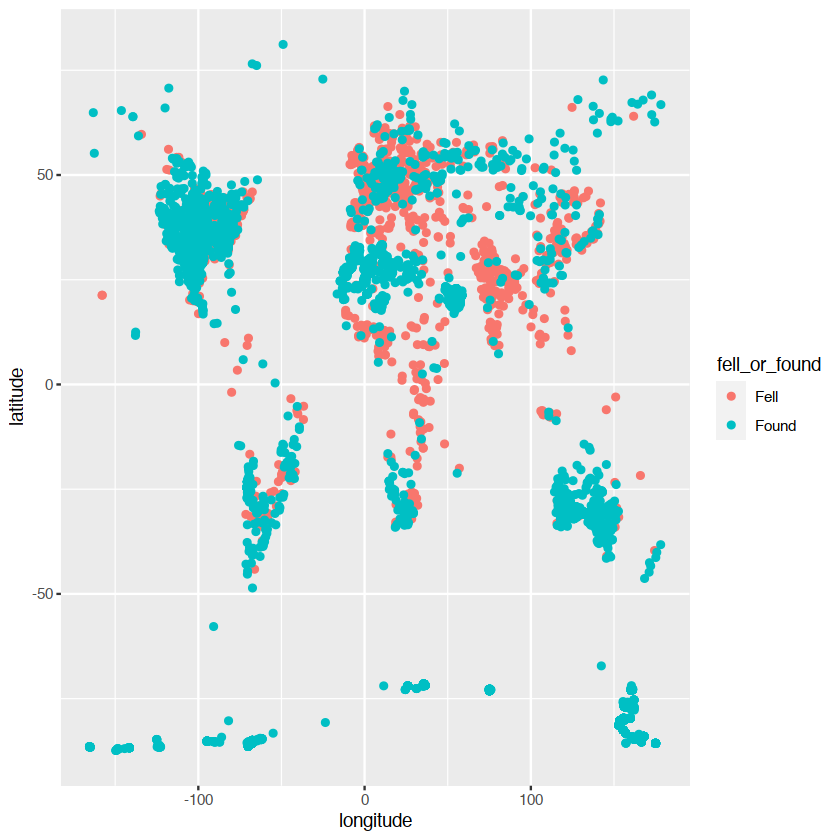

In [16]:
# Redraw
ggplot(meteorites, aes(x=longitude, y=latitude, color =fell_or_found)) + geom_point()

In [17]:
# This looks good, but in looking over the data, there's a lot of stray points 
# that I question the lat/long of.  For instance....

odd <- meteorites[ which(meteorites$latitude==-71.5), ]

summary(odd)

     name                 id          nametype           recclass        
 Length:4761        Min.   :24355   Length:4761        Length:4761       
 Class :character   1st Qu.:26014   Class :character   Class :character  
 Mode  :character   Median :27270   Mode  :character   Mode  :character  
                    Mean   :27467                                        
                    3rd Qu.:29009                                        
                    Max.   :30343                                        
                                                                         
 mass_in_grams      fell_or_found           year         latitude    
 Min.   :    0.01   Length:4761        Min.   :1969   Min.   :-71.5  
 1st Qu.:    2.49   Class :character   1st Qu.:1979   1st Qu.:-71.5  
 Median :    6.63   Mode  :character   Median :1979   Median :-71.5  
 Mean   :   94.56                      Mean   :1980   Mean   :-71.5  
 3rd Qu.:   23.04                      3rd Qu.:1979   3rd 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




     name                 id          nametype           recclass        
 Length:22111       Min.   :  378   Length:22111       Length:22111      
 Class :character   1st Qu.:10214   Class :character   Class :character  
 Mode  :character   Median :19115   Mode  :character   Mode  :character  
                    Mean   :20077                                        
                    3rd Qu.:26816                                        
                    Max.   :57412                                        
                                                                         
 mass_in_grams      fell_or_found           year         latitude     
 Min.   :       0   Length:22111       Min.   :1818   Min.   :-87.37  
 1st Qu.:       4   Class :character   1st Qu.:1983   1st Qu.:-84.00  
 Median :      14   Mode  :character   Median :1990   Median :-76.27  
 Mean   :    2919                      Mean   :1990   Mean   :-77.19  
 3rd Qu.:      49                      3rd Qu.:1999  

[1] 22111    10

     name                 id          nametype           recclass        
 Length:9781        Min.   :    1   Length:9781        Length:9781       
 Class :character   1st Qu.: 6941   Class :character   Class :character  
 Mode  :character   Median :16852   Mode  :character   Mode  :character  
                    Mean   :22534                                        
                    3rd Qu.:34562                                        
                    Max.   :57455                                        
                                                                         
 mass_in_grams      fell_or_found           year         latitude     
 Min.   :       0   Length:9781        Min.   : 860   Min.   :-57.79  
 1st Qu.:      94   Class :character   1st Qu.:1975   1st Qu.: 19.05  
 Median :     367   Mode  :character   Median :1999   Median : 25.49  
 Mean   :   54490                      Mean   :1979   Mean   : 20.52  
 3rd Qu.:    2084                      3rd Qu.:2003  

[1] 9781   10

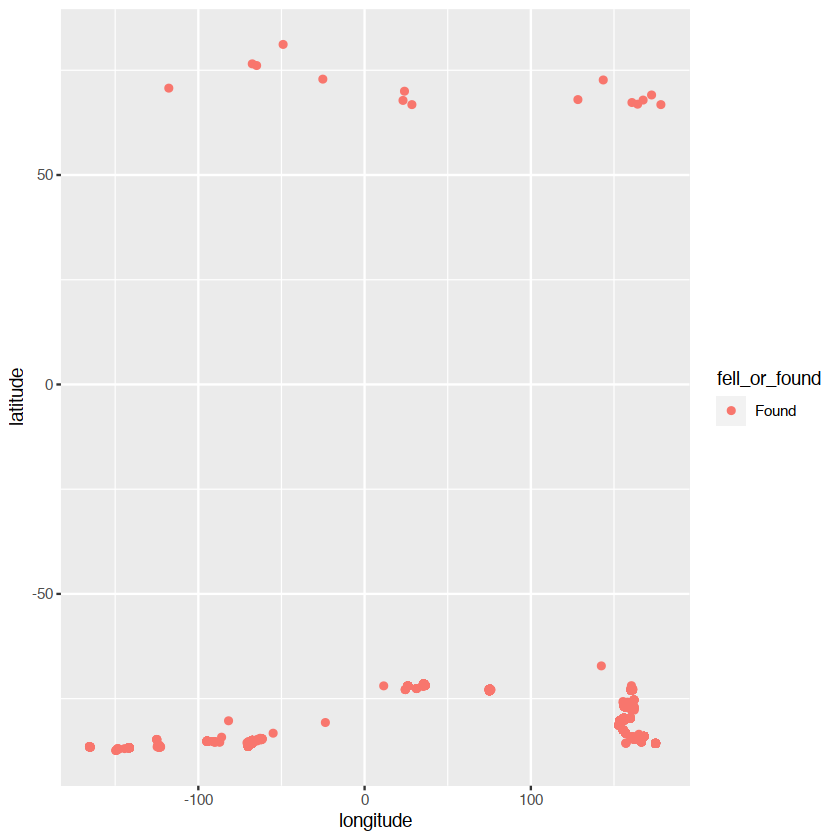

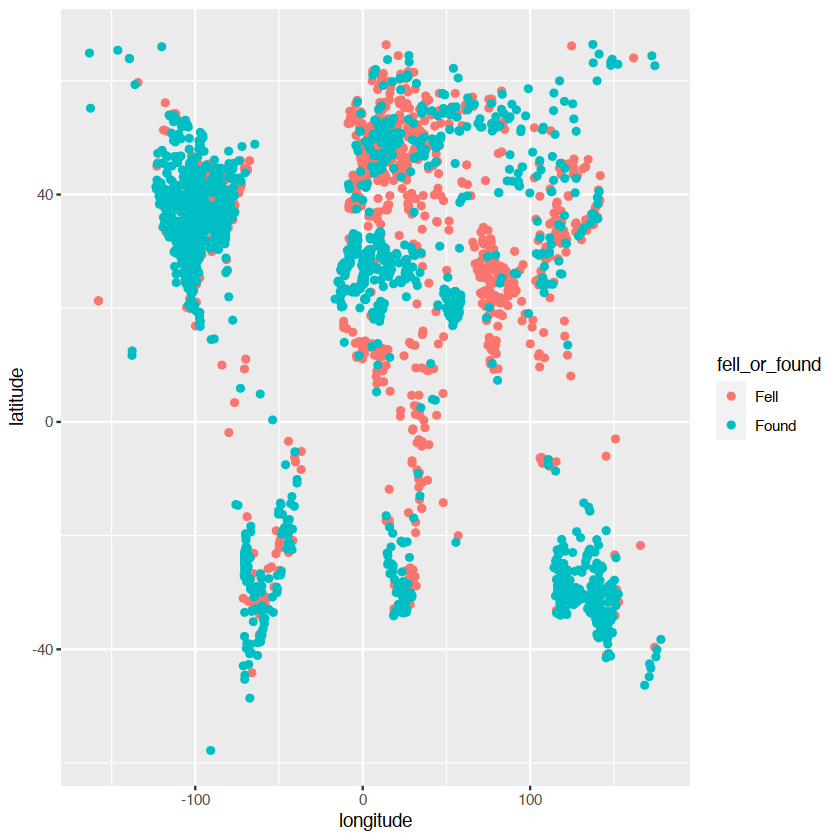

In [18]:
# 4,761 separate entries at the same geolocation of -71.5, 35.67?

# Looking over the data, it seems like there's a lot listed at other dubious locations near the poles as well.
# So, just to be safe, I'm going to only work between the arctic and antarctic circle, 
# and exclude any points in the polar regions.

library(dplyr)

polar <- filter(meteorites, (latitude < -66.5) | (latitude > 66.5))

summary(polar)

dim(polar)

ggplot(polar, aes(x=longitude, y=latitude, color =fell_or_found)) + geom_point()# What about these 

temperate <- filter(meteorites, (latitude > -66.5) & (latitude < 66.5))

summary(temperate)

dim(temperate)

ggplot(temperate, aes(x=longitude, y=latitude, color =fell_or_found)) + geom_point()# What about these 

In [19]:
meteorongs <- rbind(meteorongs, polar)
meteorites <- temperate

## Other data issues

In [17]:
#now to check each column for missing data problems....

summary(meteorites)

     name                 id          nametype           recclass        
 Length:9781        Min.   :    1   Length:9781        Length:9781       
 Class :character   1st Qu.: 6941   Class :character   Class :character  
 Mode  :character   Median :16852   Mode  :character   Mode  :character  
                    Mean   :22534                                        
                    3rd Qu.:34562                                        
                    Max.   :57455                                        
                                                                         
 mass_in_grams      fell_or_found           year         latitude     
 Min.   :       0   Length:9781        Min.   : 860   Min.   :-57.79  
 1st Qu.:      94   Class :character   1st Qu.:1975   1st Qu.: 19.05  
 Median :     367   Mode  :character   Median :1999   Median : 25.49  
 Mean   :   54490                      Mean   :1979   Mean   : 20.52  
 3rd Qu.:    2084                      3rd Qu.:2003  

In [20]:
# There are 67 meteorites that don't have a mass, and 149 that don't have a year.  
 
# I will substitute the means for the year, but the median for the mass, because of some high outliers.

meteorites$mass_in_grams[is.na(meteorites$mass_in_grams)]<-median(meteorites$mass_in_grams,na.rm=TRUE)
meteorites$year[is.na(meteorites$year)]<-mean(meteorites$year,na.rm=TRUE)

In [21]:
summary(meteorites)
dim(meteorites)
head(meteorites,10L)
tail(meteorites,10L)

     name                 id          nametype           recclass        
 Length:9781        Min.   :    1   Length:9781        Length:9781       
 Class :character   1st Qu.: 6941   Class :character   Class :character  
 Mode  :character   Median :16852   Mode  :character   Mode  :character  
                    Mean   :22534                                        
                    3rd Qu.:34562                                        
                    Max.   :57455                                        
 mass_in_grams      fell_or_found           year         latitude     
 Min.   :       0   Length:9781        Min.   : 860   Min.   :-57.79  
 1st Qu.:      95   Class :character   1st Qu.:1976   1st Qu.: 19.05  
 Median :     367   Mode  :character   Median :1998   Median : 25.49  
 Mean   :   54120                      Mean   :1979   Mean   : 20.52  
 3rd Qu.:    2027                      3rd Qu.:2002   3rd Qu.: 31.80  
 Max.   :60000000                      Max.   :2013   Ma

[1] 9781   10

,name,id,nametype,recclass,mass_in_grams,fell_or_found,year,latitude,longitude,GeoLocation
,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,Aachen,1,Valid,L5,21,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)"
2,Aarhus,2,Valid,H6,720,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)"
3,Abee,6,Valid,EH4,107000,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)"
4,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)"
5,Achiras,370,Valid,L6,780,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)"
6,Adhi Kot,379,Valid,EH4,4239,Fell,1919,32.10000,71.80000,"(32.1, 71.8)"
7,Adzhi-Bogdo (stone),390,Valid,LL3-6,910,Fell,1949,44.83333,95.16667,"(44.83333, 95.16667)"
8,Agen,392,Valid,H5,30000,Fell,1814,44.21667,0.61667,"(44.21667, 0.61667)"
9,Aguada,398,Valid,L6,1620,Fell,1930,-31.60000,-65.23333,"(-31.6, -65.23333)"


,name,id,nametype,recclass,mass_in_grams,fell_or_found,year,latitude,longitude,GeoLocation
,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
9772,Zerhamra,30403,Valid,"Iron, IIIAB-an",630000.0,Found,1967,29.85861,-2.64500,"(29.85861, -2.645)"
9773,Zerkaly,31354,Valid,H5,16000.0,Found,1956,52.13333,81.96667,"(52.13333, 81.96667)"
9774,Zhaoping,54609,Valid,"Iron, IAB complex",2000000.0,Found,1983,24.23333,111.18333,"(24.23333, 111.18333)"
9775,Zhongxiang,30406,Valid,Iron,100000.0,Found,1981,31.20000,112.50000,"(31.2, 112.5)"
9776,Zillah 001,31355,Valid,L6,1475.0,Found,1990,29.03700,17.01850,"(29.037, 17.0185)"
9777,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990,29.03700,17.01850,"(29.037, 17.0185)"
9778,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999,13.78333,8.96667,"(13.78333, 8.96667)"
9779,Zlin,30410,Valid,H4,3.3,Found,1939,49.25000,17.66667,"(49.25, 17.66667)"
9780,Zubkovsky,31357,Valid,L6,2167.0,Found,2003,49.78917,41.50460,"(49.78917, 41.5046)"


## Save out the datasets

In [20]:
# This is the final dataset I will be working with.  9,781 meteorites that fell or were found between AD 860 
# and AD 2013 between the Arctic and Antarctic cirles.

In [22]:
dim(meteorites)
write.csv(meteorites,'data/results/meteorites.csv')
dim(meteorongs)
write.csv(meteorongs,'data/results/meteorongs.csv')

[1] 9781   10

[1] 28625    10